In [78]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

### Lectura de datos extraidos de Spotify

In [79]:
df_tracks = pd.read_csv('2000-2022_all_tracks_final.csv', encoding='utf-8')

In [80]:
(df_tracks.shape)

(6274, 28)

In [81]:
# validando duplicados
df_tracks.drop_duplicates().shape

(6274, 28)

In [82]:
# eliminando columna id que esta duplicada con columna track_id
df_tracks.drop(columns=['id'], axis=1, inplace=True)

In [83]:
# validando nulos
pd.isnull(df_tracks).sum()

explicit                  0
track_id                  0
track_name                0
popularity_track          0
id_artist_1               0
name_artist_1             0
id_artist_2            4682
name_artist_2          4682
genres_artist_1           0
popularity_artist_1       0
followers_artist_1        0
genres_artist_2        4682
popularity_artist_2    4682
followers_artist_2     4682
danceability             40
energy                   40
key                      40
loudness                 40
mode                     40
speechiness              40
acousticness             40
instrumentalness         40
liveness                 40
valence                  40
tempo                    40
duration_ms              40
time_signature           40
dtype: int64

In [84]:
# eliminando tracks con caracteristicas nulas
df_tracks = df_tracks[~df_tracks['danceability'].isnull()]
df_tracks.shape

(6234, 27)

In [85]:
# validando nulos
pd.isnull(df_tracks).sum()


explicit                  0
track_id                  0
track_name                0
popularity_track          0
id_artist_1               0
name_artist_1             0
id_artist_2            4645
name_artist_2          4645
genres_artist_1           0
popularity_artist_1       0
followers_artist_1        0
genres_artist_2        4645
popularity_artist_2    4645
followers_artist_2     4645
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
duration_ms               0
time_signature            0
dtype: int64

In [86]:
df_tracks[df_tracks['danceability'].isnull()]

,explicit,track_id,track_name,popularity_track,id_artist_1,name_artist_1,id_artist_2,name_artist_2,genres_artist_1,popularity_artist_1,followers_artist_1,genres_artist_2,popularity_artist_2,followers_artist_2,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [816]:
# HASTA AQUI

### Exploracion de variables

In [667]:
#import pandas_profiling
#report = pandas_profiling.ProfileReport(df_top_tracks_all)

In [760]:
df_tracks.dtypes

explicit                  bool
track_id                object
track_name              object
popularity_track         int64
id_artist_1             object
name_artist_1           object
id_artist_2             object
name_artist_2           object
genres_artist_1         object
popularity_artist_1      int64
followers_artist_1       int64
genres_artist_2         object
popularity_artist_2    float64
followers_artist_2     float64
danceability           float64
energy                 float64
key                    float64
loudness               float64
mode                   float64
speechiness            float64
acousticness           float64
instrumentalness       float64
liveness               float64
valence                float64
tempo                  float64
id                      object
duration_ms            float64
time_signature         float64
dtype: object

In [668]:
df_tracks.sort_values(by=['popularity_track'], ascending=False).head(5)

,explicit,track_id,track_name,popularity_track,id_artist_1,name_artist_1,id_artist_2,name_artist_2,genres_artist_1,popularity_artist_1,followers_artist_1,genres_artist_2,popularity_artist_2,followers_artist_2,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
2898,True,2dHHgzDwk4BJdRwy9uXhTO,Creepin' (with The Weeknd & 21 Savage),95,0iEtIxbK0KxaSlF7G42ZOp,Metro Boomin,NaN,NaN,['rap'],92,3655628,NaN,NaN,NaN,0.715,0.620,1.0,-6.005,0.0,0.0484,0.41700,0.000000,0.0822,0.172,97.950,221520.0,4.0
2756,False,3nqQXoyQOWXiESFLlDF1hG,Unholy (feat. Kim Petras),95,2wY79sveU1sp5g7SokKOiI,Sam Smith,3Xt3RrJMFv5SZkCfUE8C1J,Kim Petras,"['pop', 'uk pop']",90,21580325,"['dance pop', 'electropop', 'pop', 'post-teen ...",83.0,853920.0,0.714,0.472,2.0,-7.375,1.0,0.0864,0.01300,0.000005,0.2660,0.238,131.121,156943.0,4.0
2704,True,4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),94,1Cs0zKBU1kc0i8ypK3B9ai,David Guetta,64M6ah0SkkRsnPGtGiRAbb,Bebe Rexha,"['big room', 'dance pop', 'edm', 'pop', 'pop d...",91,25425774,"['dance pop', 'edm', 'pop', 'post-teen pop']",85.0,7936367.0,0.561,0.965,7.0,-3.673,0.0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,175238.0,4.0
2609,False,5ww2BF9slyYgNOk37BlC4u,La Bachata,94,0tmwSHipWxN12fsoLcFU3B,Manuel Turizo,NaN,NaN,"['colombian pop', 'reggaeton', 'reggaeton colo...",86,11368558,NaN,NaN,NaN,0.835,0.679,7.0,-5.329,0.0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,162638.0,4.0
2614,False,2tTmW7RDtMQtBk7m2rYeSw,"Quevedo: Bzrp Music Sessions, Vol. 52",93,716NhGYqD1jl2wI1Qkgq36,Bizarrap,52iwsT98xCoGgiGntTiR7K,Quevedo,"['argentine hip hop', 'pop venezolano', 'trap ...",90,8906553,"['rap canario', 'urbano latino']",90.0,1083220.0,0.621,0.782,2.0,-5.548,1.0,0.0440,0.01250,0.033000,0.2300,0.550,128.033,198938.0,4.0


In [669]:
df_tracks.columns

Index(['explicit', 'track_id', 'track_name', 'popularity_track', 'id_artist_1',
       'name_artist_1', 'id_artist_2', 'name_artist_2', 'genres_artist_1',
       'popularity_artist_1', 'followers_artist_1', 'genres_artist_2',
       'popularity_artist_2', 'followers_artist_2', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'],
      dtype='object')

In [670]:
# variables categoricas
df_tracks[['track_id', 'track_name', 'id_artist_1', 'name_artist_1', 'id_artist_2', 'name_artist_2', 'genres_artist_1', 'genres_artist_2', 'explicit']].head()

,track_id,track_name,id_artist_1,name_artist_1,id_artist_2,name_artist_2,genres_artist_1,genres_artist_2,explicit
0,696DnlkuDOXcMAnKlTgXXK,ROXANNE,0vRvGUQVUjytro0xpb26bs,Arizona Zervas,NaN,NaN,"['pop', 'pop rap', 'rhode island rap', 'viral ...",NaN,True
1,7k4t7uLgtOxPwTpFmtJNTY,Tusa,790FomKkXshlbRYZFtlgla,KAROL G,0hCNtLu0JehylgoiP8L4Gh,Nicki Minaj,"['reggaeton', 'reggaeton colombiano', 'urbano ...","['dance pop', 'hip pop', 'pop', 'queens hip ho...",False
2,2b8fOow8UzyDFAE27YhOZM,Memories,04gDigrS5kc9YWfZHwBETP,Maroon 5,NaN,NaN,['pop'],NaN,False
3,4TnjEaWOeW0eKTKIEvJyCa,Falling,7uaIm6Pw7xplS8Dy06V6pT,Trevor Daniel,NaN,NaN,"['melodic rap', 'pop', 'pop rap', 'viral rap']",NaN,False
4,21jGcNKet2qwijlDFuPiPb,Circles,246dkjvS1zLTtiykXe5h60,Post Malone,NaN,NaN,"['dfw rap', 'melodic rap', 'rap']",NaN,False


In [186]:
# numero de aristas unicos
df_tracks['id_artist_1'].nunique()

2169

In [187]:
# numero de aristas unicos
df_tracks['id_artist_2'].nunique()

791

In [188]:
# tracks con dos artistas -> 30%
df_tracks[['id_artist_1']][~df_tracks['id_artist_1'].isnull() & ~df_tracks['id_artist_2'].isnull()].nunique()

id_artist_1    656
dtype: int64

In [69]:
# ambos artistas colaborados tienen generos similares
df_tracks[['track_id', 'genres_artist_1', 'genres_artist_2']][~df_tracks['id_artist_1'].isnull() & ~df_tracks['id_artist_2'].isnull()].groupby(['genres_artist_1', 
    'genres_artist_2']).count().sort_values(by='track_id', ascending=False)

,,track_id
genres_artist_1,genres_artist_2,
[],[],260
"['hoerspiel', 'writing']",[],43
['writing'],[],20
['german romanticism'],['nordic classical piano'],15
['video game music'],[],14
...,...,...
"['corrido', 'norteno', 'nueva musica mexicana', 'sad sierreno']","['corridos tumbados', 'musica mexicana', 'nueva musica mexicana', 'sad sierreno', 'sierreno']",1
"['corridos tumbados', 'sad sierreno']",['sad sierreno'],1
"['country', 'country rock', 'outlaw country', 'texas country']","['classic country pop', 'country', 'country rock', 'nashville sound', 'outlaw country', 'singer-songwriter', 'texas country']",1


In [70]:
# numero de generos
df_tracks['genres_artist_1'].nunique()

1221

In [71]:
# 962 tracks con un artista 1 sin genero
df_tracks[['track_id', 'genres_artist_1']].groupby(['genres_artist_1']).count().sort_values(['track_id'], ascending=False)

,track_id
genres_artist_1,
[],951
['pop'],172
"['dance pop', 'pop']",89
"['reggaeton', 'trap latino', 'urbano latino']",83
"['hoerspiel', 'writing']",72
...,...
"['dance pop', 'edm', 'pop', 'pop dance', 'post-teen pop', 'tropical house', 'uk pop']",1
"['dance pop', 'edm', 'pop', 'pop dance', 'scandipop', 'tropical house']",1
"['dance pop', 'edm', 'pop', 'post-teen pop']",1


In [72]:
# 34 tracks con un artista 1 sin genero, pero tienen artista 2 con genero
df_tracks[(df_tracks['genres_artist_1']=='[]') & (~df_tracks['genres_artist_2'].isnull()) & (df_tracks['genres_artist_2'] != '[]')].shape

(34, 27)

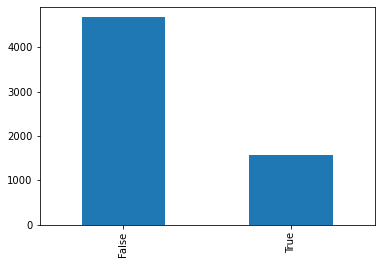

In [73]:
# variable explicit, valores True/False
df_tracks['explicit'].value_counts().plot(kind='bar');

In [74]:
# variables numericas de artistas
df_tracks[['popularity_artist_1', 'followers_artist_1','popularity_artist_2', 'followers_artist_2']].head()

,popularity_artist_1,followers_artist_1,popularity_artist_2,followers_artist_2
0,68,701427,NaN,NaN
1,87,31789223,87.0,27271132.0
2,87,39483004,NaN,NaN
3,68,735839,NaN,NaN
4,89,39542755,NaN,NaN


In [75]:
df_tracks[['popularity_artist_1', 'followers_artist_1','popularity_artist_2', 'followers_artist_2']].describe()

,popularity_artist_1,followers_artist_1,popularity_artist_2,followers_artist_2
count,6234.000000,6.234000e+03,1589.000000,1.589000e+03
mean,64.491017,1.132784e+07,62.587162,7.696616e+06
std,24.794034,2.038296e+07,23.422808,1.674079e+07
min,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,48.000000,2.367950e+04,48.000000,8.420000e+02
50%,70.000000,1.431658e+06,65.000000,2.255180e+05
75%,84.000000,1.184167e+07,83.000000,7.464302e+06
max,100.000000,1.087952e+08,100.000000,1.087952e+08


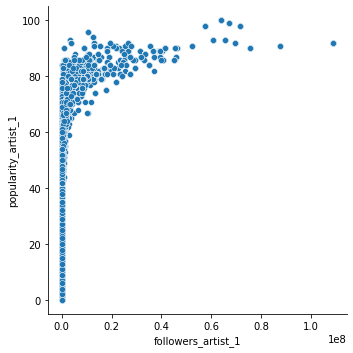

In [76]:
sns.relplot(x="followers_artist_1", y="popularity_artist_1", data=df_tracks)

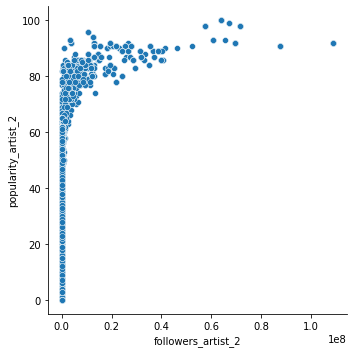

In [96]:
sns.relplot(x="followers_artist_2", y="popularity_artist_2", data=df_tracks)

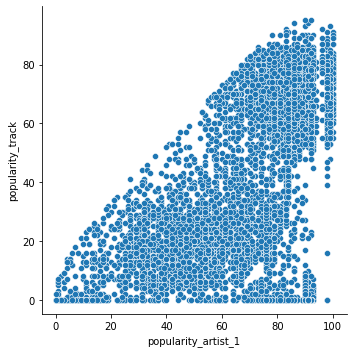

In [97]:
sns.relplot(x="popularity_artist_1", y="popularity_track", data=df_tracks)

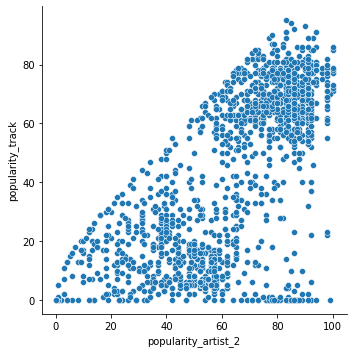

In [98]:
sns.relplot(x="popularity_artist_2", y="popularity_track", data=df_tracks)

In [99]:
# variables numericas de caracteristicas de canciones
df_tracks[['danceability', 'energy','key', 'loudness', 'mode', 'speechiness', 'acousticness','instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 
'time_signature']].head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.621,0.601,6.0,-5.616,0.0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636.0,5.0
1,0.803,0.715,2.0,-3.280,1.0,0.2980,0.2950,0.000134,0.0574,0.574,101.085,200960.0,4.0
2,0.764,0.320,11.0,-7.209,1.0,0.0546,0.8370,0.000000,0.0822,0.575,91.019,189486.0,4.0
3,0.785,0.431,10.0,-8.756,0.0,0.0364,0.1230,0.000000,0.0887,0.236,127.085,159382.0,4.0
4,0.695,0.762,0.0,-3.497,1.0,0.0395,0.1920,0.002440,0.0863,0.553,120.042,215280.0,4.0


In [100]:
df_tracks[['danceability', 'energy','key', 'loudness', 'mode', 'speechiness', 'acousticness','instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 
'time_signature']].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6.234000e+03,6234.000000
mean,0.610124,0.553773,5.240456,-9.992495,0.634905,0.189955,0.360111,0.128169,0.224189,0.474725,118.753399,2.138498e+05,3.854828
std,0.184387,0.242178,3.611099,6.736634,0.481495,0.271972,0.325681,0.293350,0.204136,0.251002,31.028264,1.310681e+05,0.600233
min,0.000000,0.000000,0.000000,-49.258000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.263500e+04,0.000000
25%,0.498000,0.387000,2.000000,-12.443000,0.000000,0.040400,0.060925,0.000000,0.100000,0.280000,94.498750,1.670765e+05,4.000000
50%,0.643000,0.588000,5.000000,-7.607000,1.000000,0.063450,0.261000,0.000003,0.136000,0.469500,117.975000,1.935190e+05,4.000000
75%,0.742000,0.738000,8.000000,-5.527500,1.000000,0.194000,0.623750,0.002972,0.280750,0.668000,139.986000,2.352842e+05,4.000000
max,0.985000,1.000000,11.000000,1.509000,1.000000,0.970000,0.996000,1.000000,0.997000,1.000000,214.019000,4.100180e+06,5.000000


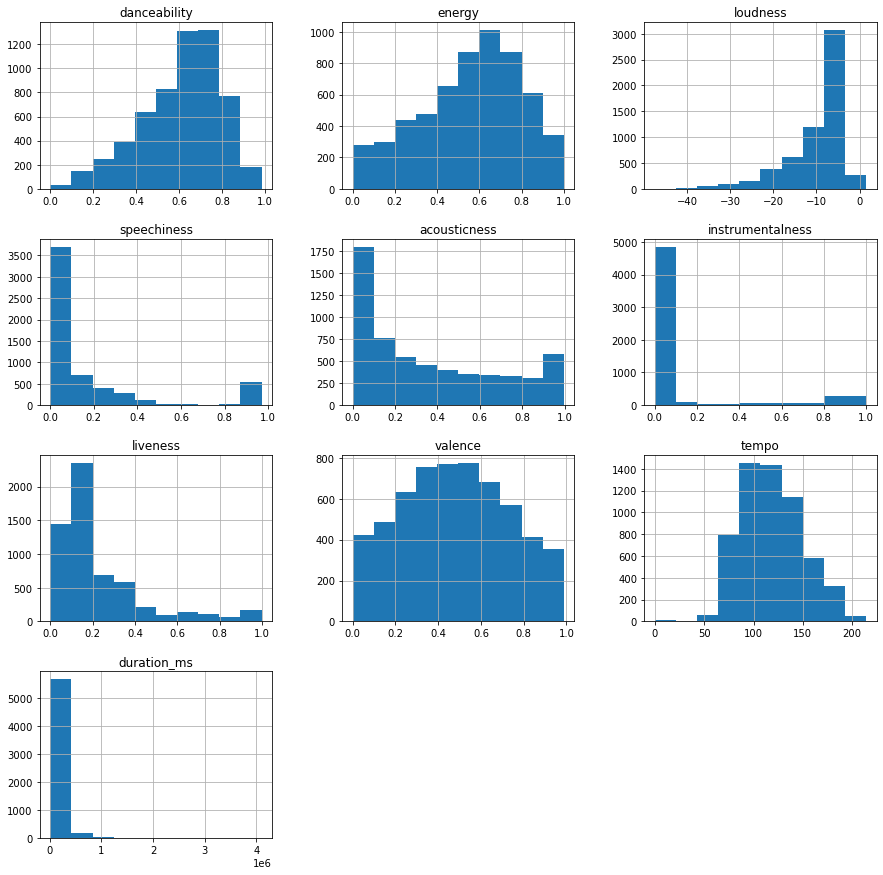

In [332]:
# histograma de variables

df_tracks[['danceability', 'energy','key', 'loudness', 'mode', 'speechiness', 'acousticness','instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 
'time_signature']].hist(figsize=(15, 15))
plt.show()

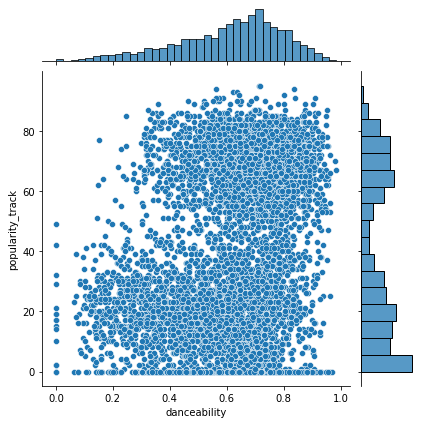

In [101]:
sns.jointplot(x="danceability", y="popularity_track", data=df_tracks)

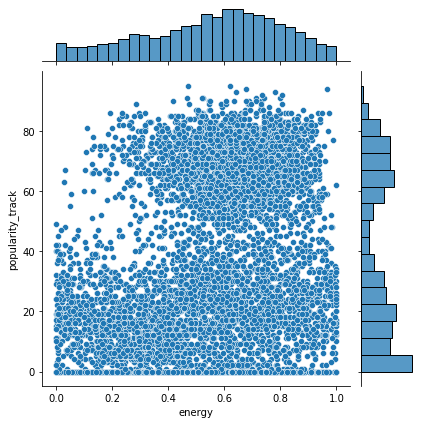

In [102]:
sns.jointplot(x="energy", y="popularity_track", data=df_tracks)

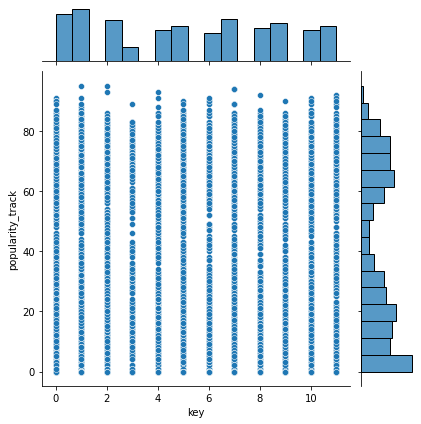

In [103]:
sns.jointplot(x="key", y="popularity_track", data=df_tracks)

<AxesSubplot:>

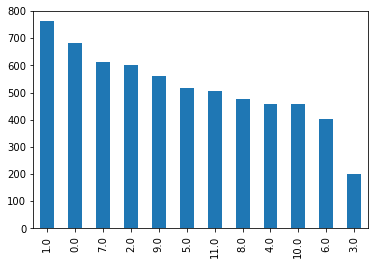

In [104]:
# variable explicit, valores categóricos
df_tracks['key'].value_counts().plot(kind='bar')

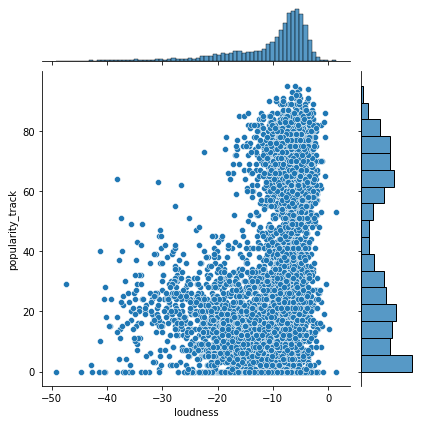

In [105]:
sns.jointplot(x="loudness", y="popularity_track", data=df_tracks)

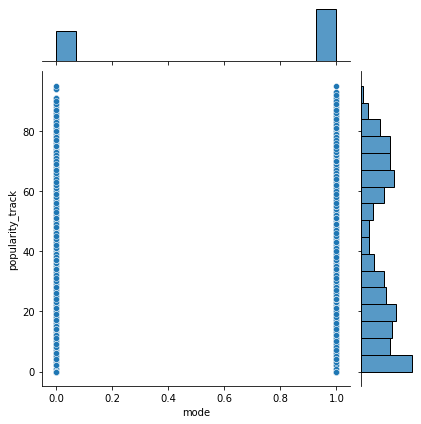

In [106]:
sns.jointplot(x="mode", y="popularity_track", data=df_tracks)

<AxesSubplot:>

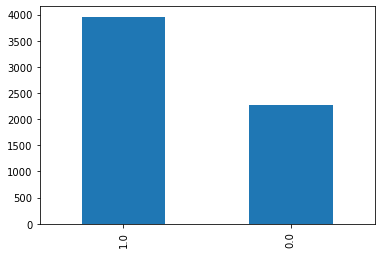

In [107]:
# variable mode, valores categóricos 
df_tracks['mode'].value_counts().plot(kind='bar')

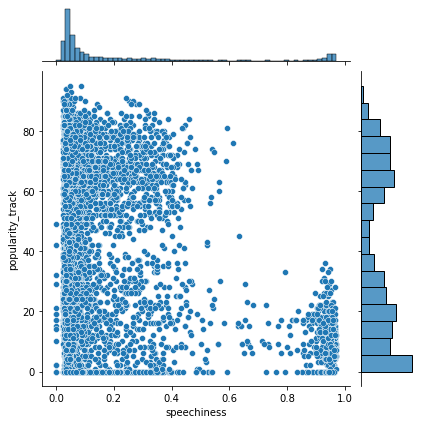

In [108]:
sns.jointplot(x="speechiness", y="popularity_track", data=df_tracks)

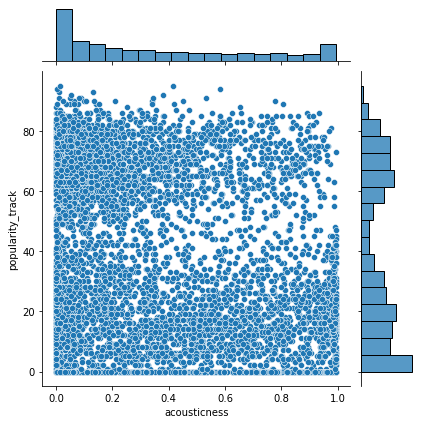

In [109]:
sns.jointplot(x="acousticness", y="popularity_track", data=df_tracks)

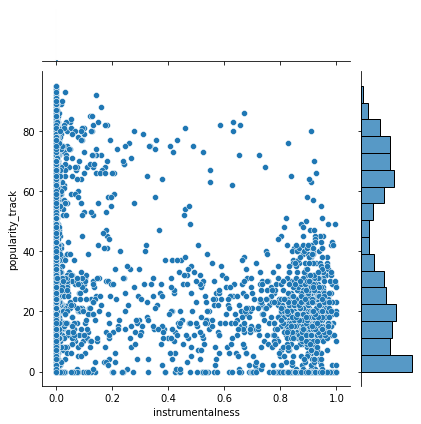

In [110]:
sns.jointplot(x="instrumentalness", y="popularity_track", data=df_tracks)

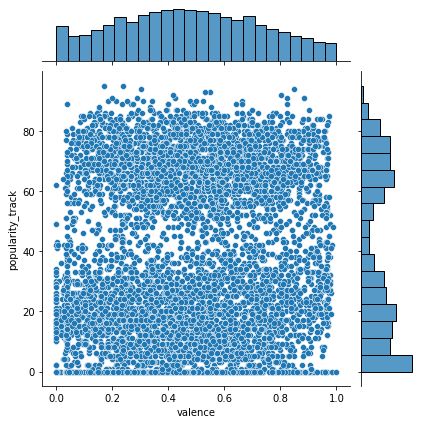

In [111]:
sns.jointplot(x="valence", y="popularity_track", data=df_tracks)

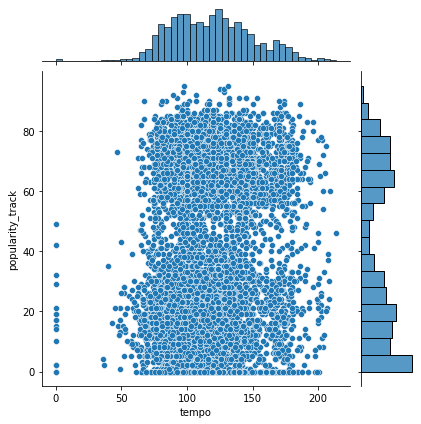

In [112]:
sns.jointplot(x="tempo", y="popularity_track", data=df_tracks)

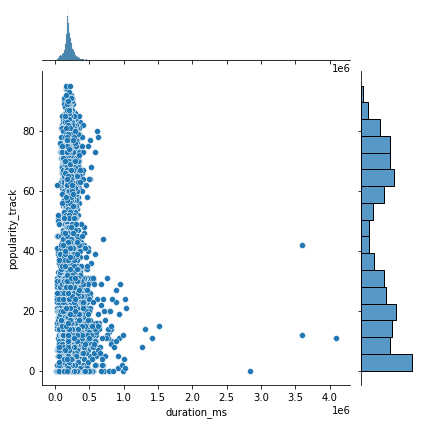

In [113]:
sns.jointplot(x="duration_ms", y="popularity_track", data=df_tracks)

<AxesSubplot:>

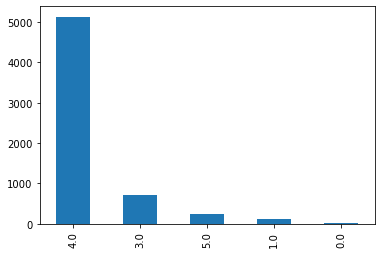

In [114]:
# variable time_signature, valores categóricos 
df_tracks['time_signature'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='mode', ylabel='popularity_track'>

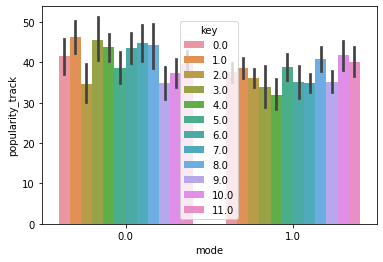

In [115]:
# combiando mode y key que estan relacionadas en la composicion musical
sns.barplot(x = 'mode', y = 'popularity_track', hue = 'key', data = df_tracks)

c:\Users\cbaut\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

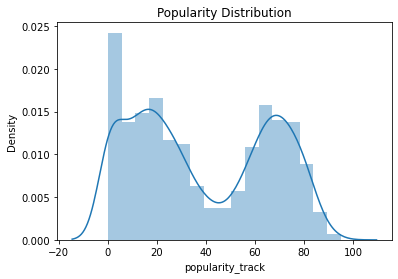

In [791]:
sns.distplot(df_tracks['popularity_track']).set_title('Popularity Distribution')

<AxesSubplot:>

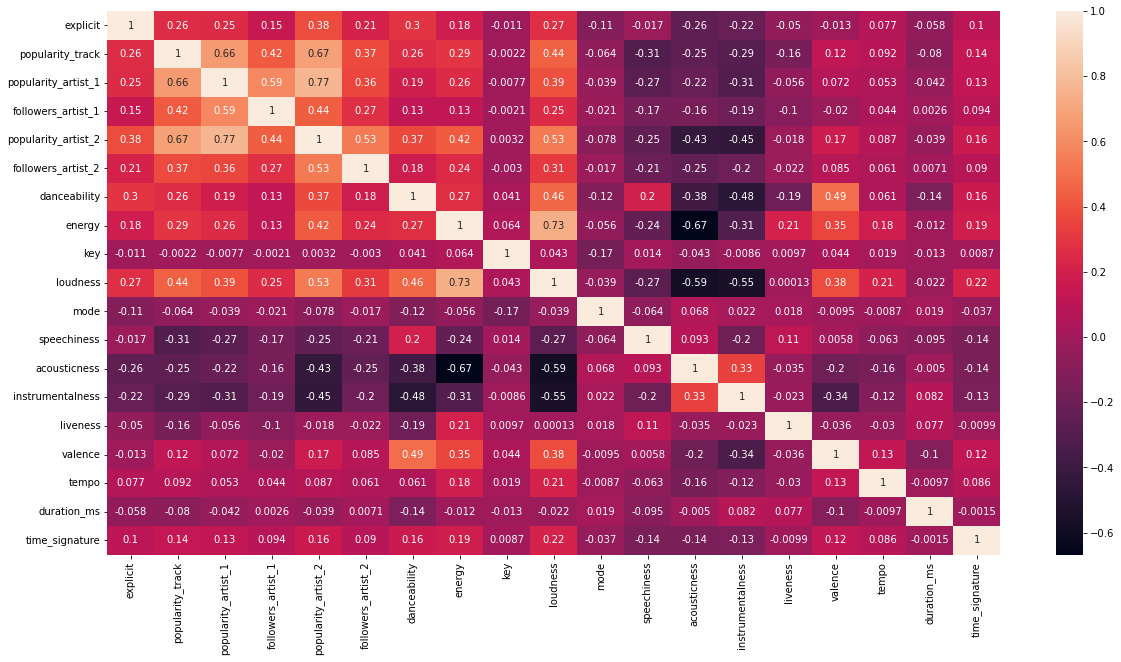

In [795]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_tracks.corr(),annot = True)

In [10]:
# Eliminando eliminando muestras con popularidad 6

df_tracks[['popularity_track']][df_tracks['popularity_track'] == 0].count()

popularity_track    526
dtype: int64

In [11]:
# eliminando registros de tracks con popularidad 0 porque tiene un numero mayor al resto de popularidad
import random
df_tracks_0 = df_tracks[df_tracks['popularity_track'] == 0].sample(n=150, random_state=1)
df_tracks_resto = df_tracks[(df_tracks['popularity_track'] > 0)]
df_tracks = pd.concat([df_tracks_0, df_tracks_resto])

c:\Users\cbaut\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

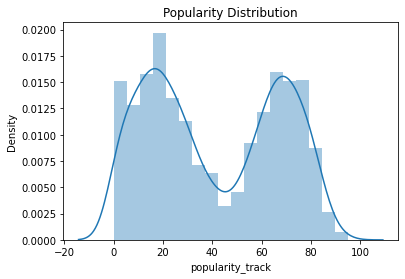

In [12]:
sns.distplot(df_tracks['popularity_track']).set_title('Popularity Distribution')

### Elimnando Outliers

In [796]:
# eliminar outliers de speechiness
#df_tracks = df_tracks[df_tracks['speechiness'] > 0.7]

In [797]:
# eliminar outliers de tempo
#df_tracks = df_tracks[df_tracks['tempo'] > 30]

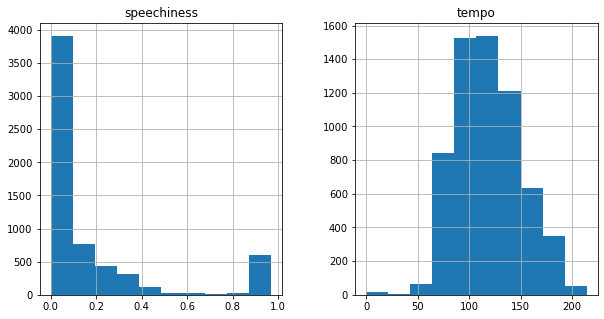

In [798]:
# histograma de speechiness y tempo

df_tracks[['speechiness', 'tempo']].hist(figsize=(10, 5))
plt.show()

### Transformado variables categoricas

In [13]:
#Tranformando variables categoricas
df_tracks['key'] = df_tracks['key'].astype('category')
df_tracks['mode'] = df_tracks['mode'].astype('category')
df_tracks['time_signature'] = df_tracks['time_signature'].astype('category')

In [87]:
#listado de columnas a incluir en el modelo
col_caract = ['danceability', 'duration_ms', 'energy', 'instrumentalness', 'speechiness', 'liveness', 'explicit', 'key', 
       'loudness', 'mode', 'valence', 'tempo', 'time_signature']

##### Realizando one hot encoding de variables categoricas

In [15]:
df_tracks_tmp = pd.get_dummies(df_tracks[col_caract])
df_tracks_tmp.head()

,danceability,duration_ms,energy,instrumentalness,speechiness,liveness,explicit,loudness,valence,tempo,followers_artist_1,key_0.0,key_1.0,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,mode_0.0,mode_1.0,time_signature_0.0,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0
2233,0.878,185213.0,0.575,0.00000,0.2840,0.2730,True,-8.732,0.3990,144.918,4939478,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
5488,0.475,97480.0,0.262,0.77300,0.0407,0.0749,False,-21.722,0.2500,123.242,1957,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
3371,0.227,65991.0,0.247,0.95900,0.0364,0.1140,False,-20.318,0.0374,73.590,4900,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4422,0.713,122400.0,0.804,0.00226,0.0646,0.1020,True,-4.487,0.4300,149.911,10,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1136,0.769,176867.0,0.719,0.00777,0.0474,0.3590,True,-5.472,0.8630,121.955,925826,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [16]:
from pandas.api.types import is_numeric_dtype

num_cols = [col for col in df_tracks.columns if is_numeric_dtype(df_tracks[col])]
num_cols

['explicit',
 'popularity_track',
 'popularity_artist_1',
 'followers_artist_1',
 'popularity_artist_2',
 'followers_artist_2',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

### Transformado variables numericas

In [17]:
# cambiado duracion a minutos 

df_tracks_tmp['duration_m'] = round(df_tracks_tmp['duration_ms']/60000, 2)
df_tracks_tmp.head()

,danceability,duration_ms,energy,instrumentalness,speechiness,liveness,explicit,loudness,valence,tempo,followers_artist_1,key_0.0,key_1.0,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,mode_0.0,mode_1.0,time_signature_0.0,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0,duration_m
2233,0.878,185213.0,0.575,0.00000,0.2840,0.2730,True,-8.732,0.3990,144.918,4939478,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,3.09
5488,0.475,97480.0,0.262,0.77300,0.0407,0.0749,False,-21.722,0.2500,123.242,1957,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1.62
3371,0.227,65991.0,0.247,0.95900,0.0364,0.1140,False,-20.318,0.0374,73.590,4900,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1.10
4422,0.713,122400.0,0.804,0.00226,0.0646,0.1020,True,-4.487,0.4300,149.911,10,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,2.04
1136,0.769,176867.0,0.719,0.00777,0.0474,0.3590,True,-5.472,0.8630,121.955,925826,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,2.95


c:\Users\cbaut\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


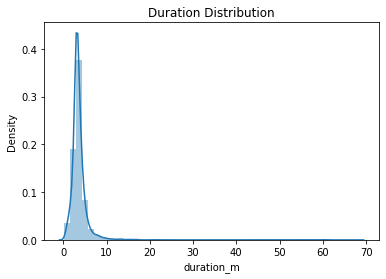

In [18]:
sns.distplot(df_tracks_tmp['duration_m']).set_title('Duration Distribution');

In [19]:
# eliminando duracion en milisegundos

df_tracks_tmp.drop(['duration_ms'], axis=1, inplace=True)

In [20]:
#Escalando variables 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy= True, with_mean=True, with_std=True)
df_scaler = scaler.fit_transform(df_tracks_tmp)

In [22]:
df_scaler

array([[ 1.45068536,  0.07334603, -0.42663239, ...,  0.45861812,
        -0.19893238, -0.22236212],
       [-0.72638613, -1.22948335,  2.27057908, ...,  0.45861812,
        -0.19893238, -0.91156454],
       [-2.06612244, -1.29191926,  2.91958468, ..., -2.18046335,
        -0.19893238, -1.15536404],
       ...,
       [ 0.33243772,  1.05150866, -0.4266282 , ...,  0.45861812,
        -0.19893238, -0.5458653 ],
       [-0.56432126, -0.18472241, -0.42663239, ...,  0.45861812,
        -0.19893238,  0.99663537],
       [ 0.29462258, -0.95476533, -0.42663239, ...,  0.45861812,
        -0.19893238, -0.25986973]])

### Modelos de Regresion Lineal

In [23]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

#### Diviendo dataset en Train y Test

In [24]:
from sklearn.model_selection import train_test_split

X = df_scaler
y = df_tracks['popularity_track']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((4686, 30), (1172, 30), (4686,), (1172,))

#### Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.404598291851062

In [26]:
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

print(f'Score de train:{lr.score(X_train, y_train): .2f}')
print(f'Score de test:{lr.score(X_test, y_test): .2f}')

Score de train: 0.45
Score de test: 0.40


#### Regresion Lineal - Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model

linreg = LinearRegression()
linreg.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model

scores = cross_val_score(linreg, X_train, y_train, cv=5)
print(scores)

[0.45076749 0.4207658  0.47458736 0.4051107  0.44714718]


#### Decision Tree Regressor

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

reg_tree = DecisionTreeRegressor().fit(X_train, y_train)
reg_tree.score(X_test, y_test)

0.19970497330255343

In [29]:
reg_ = GridSearchCV(
        DecisionTreeRegressor(), 
        param_grid={'max_depth': [3, 5],
                'min_samples_leaf': [3, 10, 15, 20, 30]
                }).fit(X_train, y_train)

In [30]:
reg_.best_score_

0.5278744755824392

In [31]:
reg_.best_params_

{'max_depth': 5, 'min_samples_leaf': 30}

In [32]:
y_test_pred = reg_.predict(X_test)
y_train_pred = reg_.predict(X_train)

print(f'Score de train:{reg_.score(X_train, y_train): .2f}')
print(f'Score de test:{reg_.score(X_test, y_test): .2f}')

Score de train: 0.57
Score de test: 0.50


#### Gradien Boosting Regressor

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

reg_gbr = GradientBoostingRegressor().fit(X_train, y_train)
reg_gbr.score(X_test, y_test)

0.5503842949085227

In [34]:
reg_ = GridSearchCV(
       GradientBoostingRegressor(),
       param_grid = { 'max_depth': [3, 5],
                      'min_samples_leaf': [3, 10, 15, 20, 30]
       }).fit(X_train, y_train)

In [35]:
reg_.best_params_

{'max_depth': 5, 'min_samples_leaf': 10}

In [36]:
reg_.best_score_

0.5879609183854491

In [37]:
y_test_pred = reg_.predict(X_test)
y_train_pred = reg_.predict(X_train)

print(f'Score de train:{reg_.score(X_train, y_train): .2f}')
print(f'Score de test:{reg_.score(X_test, y_test): .2f}')

Score de train: 0.75
Score de test: 0.56


### Modelos de Clasificacion    

In [38]:
df_tracks_tmp.head()

,danceability,energy,instrumentalness,speechiness,liveness,explicit,loudness,valence,tempo,followers_artist_1,key_0.0,key_1.0,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,mode_0.0,mode_1.0,time_signature_0.0,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0,duration_m
2233,0.878,0.575,0.00000,0.2840,0.2730,True,-8.732,0.3990,144.918,4939478,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,3.09
5488,0.475,0.262,0.77300,0.0407,0.0749,False,-21.722,0.2500,123.242,1957,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1.62
3371,0.227,0.247,0.95900,0.0364,0.1140,False,-20.318,0.0374,73.590,4900,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1.10
4422,0.713,0.804,0.00226,0.0646,0.1020,True,-4.487,0.4300,149.911,10,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,2.04
1136,0.769,0.719,0.00777,0.0474,0.3590,True,-5.472,0.8630,121.955,925826,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,2.95


In [39]:
pd.cut(df_tracks['popularity_track'], bins=3, labels = ["low", "medium", "high"]).value_counts()

low       2729
high      1806
medium    1323
Name: popularity_track, dtype: int64

In [40]:
# conviertiendo variable target a categorica, se crearn 3 grupos de popularidad
df_tracks['popularity_track'] = pd.cut(df_tracks['popularity_track'], bins=3, labels = ["low", "medium", "high"], right = True)

<AxesSubplot:>

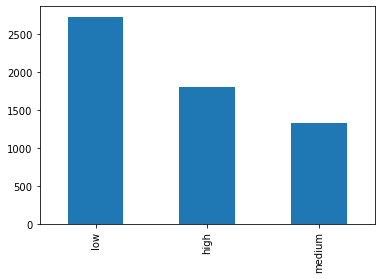

In [41]:
df_tracks['popularity_track'].value_counts().plot(kind='bar')

In [42]:
X = df_scaler
y = df_tracks['popularity_track']

In [43]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

(X_ros.shape, y_ros.shape)

((8187, 30), (8187,))

<AxesSubplot:>

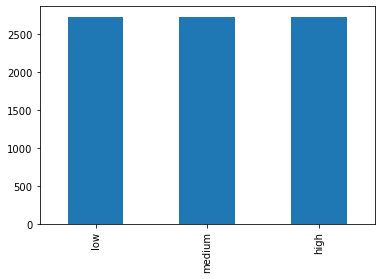

In [44]:
y_ros.value_counts().plot(kind='bar')

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2,random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((6549, 30), (1638, 30), (6549,), (1638,))

#### KNeighbors Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [48]:
print(f'Score de train:{knn.score(X_train, y_train): .2f}')
print(f'Score de test:{knn.score(X_test, y_test): .2f}')

Score de train: 0.75
Score de test: 0.60


#### Decission Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier().fit(X_train, y_train)
clf_tree.score(X_test, y_test)

0.7838827838827839

In [50]:
clf_ = GridSearchCV(
        DecisionTreeClassifier(),
        param_grid= {'max_depth': [3, 5, 8],
                     'min_samples_leaf': [3, 10, 20, 50]
        }).fit(X_train, y_train)

In [51]:
clf_.best_score_

0.633835979915908

In [52]:
clf_.best_params_

{'max_depth': 8, 'min_samples_leaf': 3}

In [53]:
print(f'Score de train:{clf_.score(X_train, y_train): .2f}')
print(f'Score de test:{clf_.score(X_test, y_test): .2f}')

Score de train: 0.69
Score de test: 0.64


#### Gradient Boosting Classifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

clf_gbc = GradientBoostingClassifier().fit(X_train, y_train)
clf_gbc.score(X_test, y_test)

0.6904761904761905

In [55]:
clf_ = GridSearchCV(
       GradientBoostingClassifier(),
       param_grid = { 'max_depth': [2, 3, 5],
                      'min_samples_leaf': [3, 10, 15, 20, 30]
       }).fit(X_train, y_train)

In [56]:
clf_.best_params_

{'max_depth': 5, 'min_samples_leaf': 3}

In [57]:
clf_.best_score_

0.7656116492398486

In [58]:
print(f'Score de train:{clf_.score(X_train, y_train): .2f}')
print(f'Score de test:{clf_.score(X_test, y_test): .2f}')

Score de train: 0.90
Score de test: 0.77


In [59]:
y_test_pred = clf_.predict(X_test)

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

        high       0.73      0.83      0.77       532
         low       0.85      0.80      0.83       544
      medium       0.73      0.69      0.71       562

    accuracy                           0.77      1638
   macro avg       0.77      0.77      0.77      1638
weighted avg       0.77      0.77      0.77      1638



## Generar pickle de modelo

In [77]:
#generar picke del modelo
import pickle

pickle.dump(clf_ ,open(r"spotify-streamlit-app\gb_clf.pkl","wb"))    